/Users/sumeet/Documents/epic_like_distances_draft/canon.py:78: RuntimeWarning: invalid value encountered in true_divide
  norm = {f'{c_name}-{n_ord}': val / norm_wrapper(val, n_ord)
/Users/sumeet/Documents/epic_like_distances_draft/canon.py:85: RuntimeWarning: invalid value encountered in true_divide
  norm[f'Minimal-{n_ord}'] = min_can / norm_wrapper(min_can, n_ord)


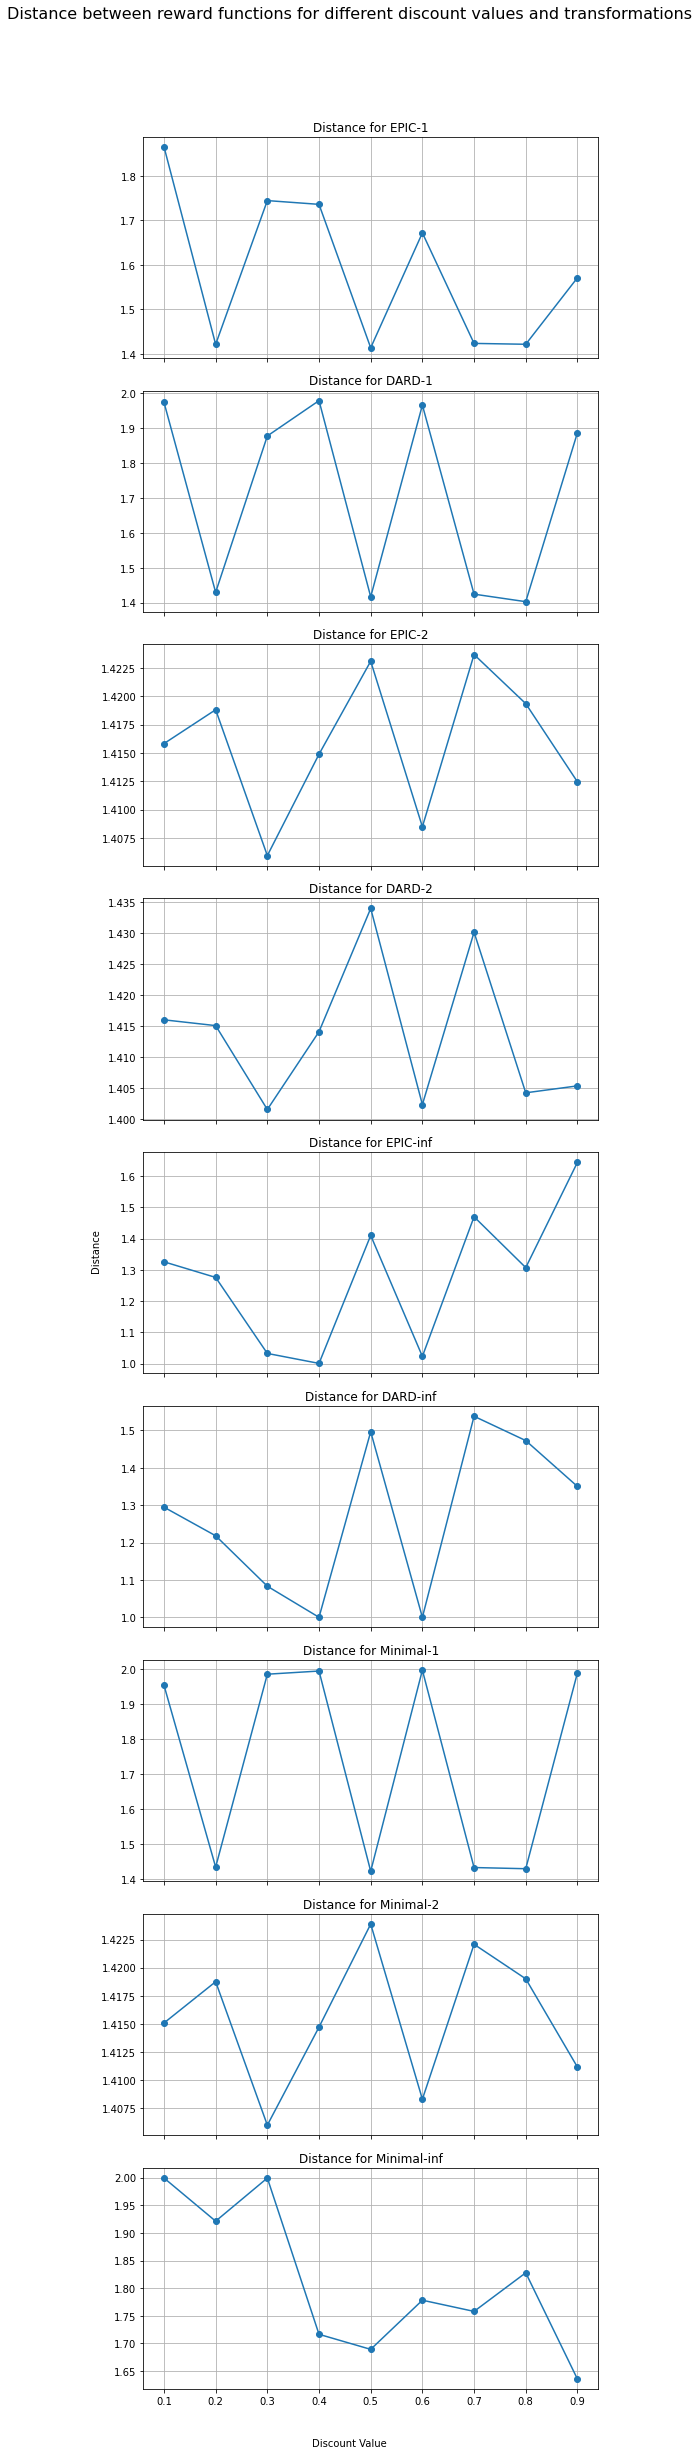

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from env import RandomEnv
from reward import random_reward
from canon import canon_and_norm

n_s = 32
n_a = np.random.randint(2, 16)

def get_norm_order(key: str):
    if "-1" in key:
        return 1
    elif "-2" in key:
        return 2
    elif "-inf" in key:
        return np.inf
    else:
        return None

r1, r2 = None, None
discount_values = np.linspace(0.1, 1, 10)


example_env = RandomEnv(n_s, n_a=n_a)
r_example = random_reward(example_env)
can_example = canon_and_norm(r_example, example_env)
all_keys = [key for key in can_example.keys() if "0" not in key and "None" not in key]


all_distances = {key: [] for key in all_keys}

for discount in discount_values:
    env = RandomEnv(n_s, n_a=n_a, discount=discount)
    r1, r2 = random_reward(env), random_reward(env)
    can_1 = canon_and_norm(r1, env)
    can_2 = canon_and_norm(r2, env)
    
    for key in all_keys:
        r1_val = can_1[key]
        r2_val = can_2[key]
        norm_order = get_norm_order(key)

        distance = np.linalg.norm((r1_val - r2_val).flatten(), norm_order)
        all_distances[key].append(distance)


num_keys = len(all_keys)
fig, axs = plt.subplots(num_keys, 1, figsize=(8, num_keys * 4), sharex=True)

for i, key in enumerate(all_keys):
    axs[i].plot(discount_values, all_distances[key], marker='o')
    axs[i].set_title(f'Distance for {key}')
    axs[i].grid()

fig.text(0.5, 0.04, 'Discount Value', ha='center', va='center')
fig.text(0.06, 0.5, 'Distance', ha='center', va='center', rotation='vertical')
fig.suptitle('Distance between reward functions for different discount values and transformations', fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()


In [ ]:
#Now we need to find How the correlation between two reward functions differs as we change the discount:
#Here's the pseudocode to implement
#Loop through the discounts from 0.1, 0.2, to 1
#Generate an environment
#Generate a reward
#Now for norm order 1, use 'EPIC-1', 'DARD-1', 'Minimal-1'. For norm order 2, 'EPIC-2', 'DARD-2', 'Minimal-2', and likewise for L_infinity
#Now for each pair in the norms, store how their correlation changes as discount changes
#Plot the results

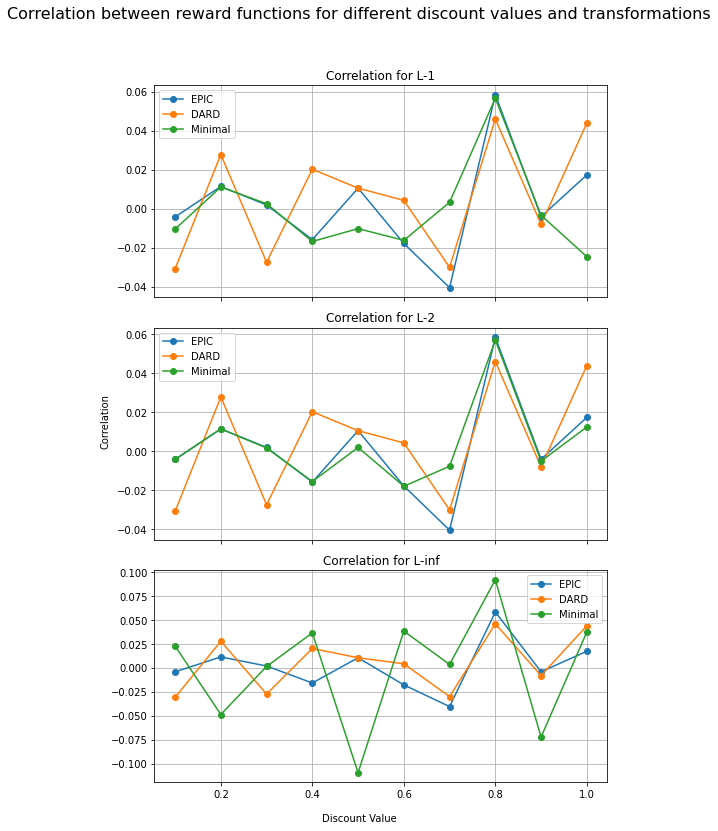

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from env import RandomEnv
from reward import random_reward
from canon import canon_and_norm

n_s = 32
n_a = np.random.randint(2, 16)

r1, r2 = None, None
discount_values = np.linspace(0.1, 1, 10)

norm_orders = [1, 2, np.inf]
canon_types = ['EPIC', 'DARD', 'Minimal']

all_correlations = {
    (norm_order, canon_type): [] for norm_order in norm_orders for canon_type in canon_types
}

for discount in discount_values:
    env = RandomEnv(n_s, n_a=n_a, discount=discount)
    r1, r2 = random_reward(env), random_reward(env)
    can_1 = canon_and_norm(r1, env)
    can_2 = canon_and_norm(r2, env)

    for norm_order in norm_orders:
        for canon_type in canon_types:
            key = f"{canon_type}-{norm_order}"
            r1_val = can_1[key]
            r2_val = can_2[key]
            correlation = np.corrcoef(r1_val.flatten(), r2_val.flatten())[0, 1]
            all_correlations[(norm_order, canon_type)].append(correlation)

fig, axs = plt.subplots(len(norm_orders), 1, figsize=(8, len(norm_orders) * 4), sharex=True)

for i, norm_order in enumerate(norm_orders):
    for canon_type in canon_types:
        axs[i].plot(
            discount_values, all_correlations[(norm_order, canon_type)], marker='o', label=canon_type
        )
    axs[i].set_title(f'Correlation for L-{norm_order}')
    axs[i].legend()
    axs[i].grid()

fig.text(0.5, 0.04, 'Discount Value', ha='center', va='center')
fig.text(0.06, 0.5, 'Correlation', ha='center', va='center', rotation='vertical')
fig.suptitle('Correlation between reward functions for different discount values and transformations', fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()
